In [21]:
%store -r data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


In [22]:
from keras.models import load_model

In [23]:
cropped_data = data.iloc[800000:]

In [24]:
target = cropped_data['Target']
predictors = cropped_data.drop('Target', axis=1)

In [25]:
def plot_one_residuals(model_name, predictors=predictors, target=target):
    loaded_model = load_model(model_name + '.h5')
    print(f"Loaded model {model_name} from disk.")
    pred = loaded_model.predict(predictors).reshape(-1)
    print(pred)
    plt.figure(figsize=(7,7))
    sns.set()
    sns.scatterplot(x=pred, y=target).set(xlabel="Predicted values", ylabel="Actual values", title="Residual plot")
    plt.show()

Loaded model model_2 from disk.
[0.4482762  0.46806395 0.4555024  ... 0.43249196 0.46696255 0.45085827]


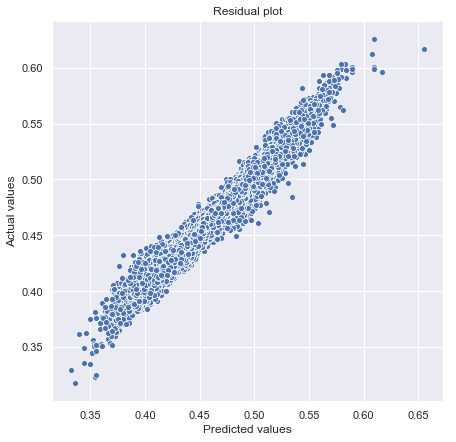

In [52]:
plot_one_residuals('model_2')

Loaded model model_2_10_layers from disk.
[0.4511361  0.47154203 0.4642554  ... 0.43335187 0.47211534 0.4541625 ]


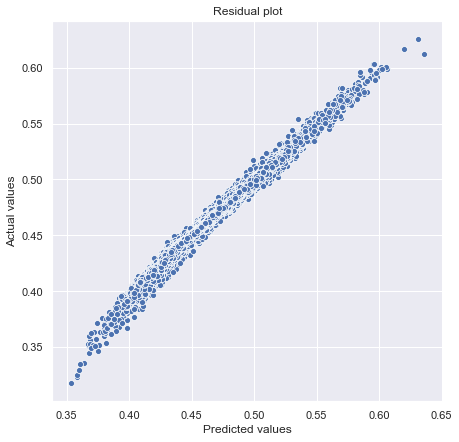

In [53]:
plot_one_residuals('model_2_10_layers')

Loaded model bestmodelPCA from disk.
[0.4521289  0.47263086 0.46353143 ... 0.43499643 0.4732563  0.45394582]


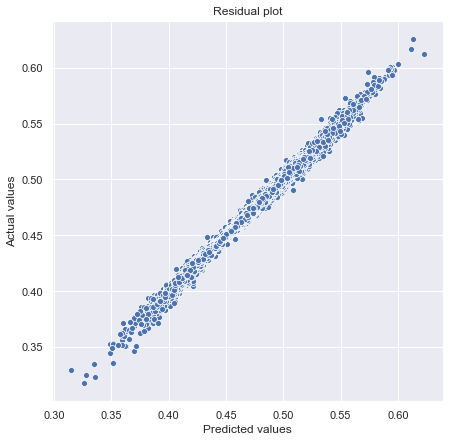

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=23)
pca.fit_transform(data.drop('Target', axis=1))

plot_one_residuals('bestmodelPCA',predictors = pca.transform(predictors) )

In [3]:
import pandas as pd
shuffled_dataset = pd.read_csv('shuffled_dataset.csv')
shuffled_dataset.set_index("ID", drop=True, inplace=True)

In [13]:
shuffled_dataset.head()

,S1,S2,S3,mu1,mu2,mu3,sigma1,sigma2,sigma3,rho12,...,YetiCoupon,PhoenixBarrier,PhoenixCoupon,PDIBarrier,PDIGearing,PDIStrike,PDIType,Maturity,NbDates,Target
ID,,,,,,,,,,,,,,,,,,,,,
796199,0.358021,0.371698,0.352328,0.576943,0.025347,0.345669,0.631537,0.127585,0.930033,0.655870,...,0.206136,0.516732,0.446453,0.038354,0.688936,0.669562,0.107138,0.967634,0.50,0.501139
579339,0.361066,0.334910,0.332623,0.404842,0.101856,0.561467,0.063701,0.914047,0.815639,0.698043,...,0.423477,0.707200,0.176480,0.363401,0.453549,0.298763,0.726197,0.821384,0.25,0.451884
669035,0.365797,0.374780,0.424527,0.264287,0.879574,0.745688,0.637208,0.611876,0.901558,0.510569,...,0.692497,0.777930,0.490109,0.546155,0.297209,0.736772,0.265247,0.831753,0.65,0.452468
834727,0.367877,0.369240,0.380216,0.231620,0.005614,0.706603,0.820208,0.214666,0.416240,0.533424,...,0.564026,0.091746,0.878858,0.093106,0.062841,0.273750,0.494776,0.916486,0.80,0.448424
336952,0.420930,0.089086,0.923445,0.733754,0.408651,0.510499,0.819374,0.044374,0.172859,0.282606,...,0.395299,0.209647,0.427158,0.996084,0.368761,0.501831,0.296123,0.573560,0.30,0.506270


In [10]:
x_train, x_test, y_train, y_test = train_test_split(shuffled_dataset.drop('Target', axis=1), shuffled_dataset['Target'], test_size=0.2, shuffle=False)

In [12]:
from sklearn.decomposition import PCA
from defining_model_1 import baseline_model

In [13]:
pca = PCA()
train_pca = pca.fit_transform(x_train)
validation_pca = pca.transform(x_test)
pca_dataset = pd.concat([pd.DataFrame(train_pca),pd.DataFrame(validation_pca)])



In [15]:
#target of a shuffled dataset 
pca_target = y_train.append(y_test)
pca_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.341077,-0.208757,-0.034781,-0.134980,-0.625206,-0.197543,0.208284,0.454113,-0.317082,-0.331777,...,-0.236695,0.077768,0.012712,0.454187,-0.329907,0.460918,-0.165545,-0.141087,0.006068,-0.013718
1,-0.010636,0.440783,0.115959,-0.424645,0.000071,-0.339065,-0.059806,-0.009098,-0.397993,-0.006727,...,-0.084606,0.037645,0.238813,-0.048861,0.468235,-0.017925,0.014872,-0.171546,0.017181,0.015799
2,-0.033238,-0.240705,0.221019,-0.043382,0.401619,0.143903,0.035125,0.226607,-0.525794,-0.351333,...,0.002719,0.035559,-0.077606,-0.369856,-0.068781,0.164758,0.117156,-0.093241,-0.042786,0.005174
3,-0.574544,-0.164090,-0.495165,0.076944,-0.255416,0.162312,-0.055681,-0.310137,0.105072,-0.735777,...,-0.338924,-0.049709,-0.166082,-0.149989,-0.010258,0.083071,-0.108772,-0.117829,-0.009964,-0.001570
4,0.513473,-0.151767,-0.036679,0.197512,-0.469427,0.126222,0.359370,0.034781,0.232667,-0.064211,...,-0.320416,-0.184730,-0.276979,0.227311,-0.486740,0.153887,0.103139,0.065775,-0.454631,0.381528


In [16]:
pca_target.head()

ID
796199    0.501139
579339    0.451884
669035    0.452468
834727    0.448424
336952    0.506270
Name: Target, dtype: float64

In [17]:
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('bestmodel_10_PCA_shuffled.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
model_1 = baseline_model(input_layer=300)
model_1.fit(pca_dataset, pca_target, epochs=15, batch_size=32, validation_split=0.2,
                callbacks=[model_checkpoint])

Train on 800000 samples, validate on 200000 samples
Epoch 1/15
800000/800000 [==============================] - 250s 313us/step - loss: 1.3658e-04 - val_loss: 2.5367e-05

Epoch 00001: val_loss improved from inf to 0.00003, saving model to bestmodel_10_PCA_shuffled.h5
Epoch 2/15
800000/800000 [==============================] - 257s 321us/step - loss: 1.8544e-05 - val_loss: 1.0203e-05

Epoch 00002: val_loss improved from 0.00003 to 0.00001, saving model to bestmodel_10_PCA_shuffled.h5
Epoch 3/15
800000/800000 [==============================] - 258s 322us/step - loss: 1.3192e-05 - val_loss: 1.1524e-05

Epoch 00003: val_loss did not improve from 0.00001
Epoch 4/15
800000/800000 [==============================] - 259s 324us/step - loss: 1.0850e-05 - val_loss: 6.4292e-06

Epoch 00004: val_loss improved from 0.00001 to 0.00001, saving model to bestmodel_10_PCA_shuffled.h5
Epoch 5/15
800000/800000 [==============================] - 258s 322us/step - loss: 9.1012e-06 - val_loss: 5.9014e-06

Epo

Loaded model bestmodel_10_PCA_shuffled from disk.
[0.44858682 0.44497    0.4635758  ... 0.48171973 0.48711914 0.47372183]


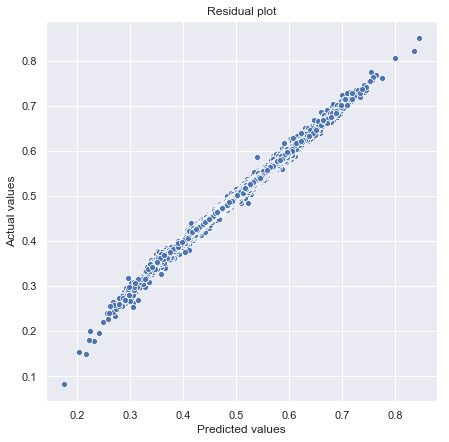

In [26]:
plot_one_residuals('bestmodel_10_PCA_shuffled',predictors = validation_pca, target = y_test )

In [31]:
from import_csv import read_file
import numpy as np
from sving_models import model_load

test_dataset = read_file('test_input_D77jaRF.csv')
benchmark_model = model_load('bestmodel_10_PCA_shuffled')
benchmark_prediction = benchmark_model.predict(pca.transform(test_dataset))
print("STATUS: predictions made, saving results...")
pd.DataFrame(benchmark_prediction, index=np.arange(1000000, 1000000 + len(benchmark_prediction)),
                 columns=['Target']).to_csv('pca_10_shuffled_results.csv', index_label=['ID'])


C:\Users\Admin\PycharmProjects\option_pricing\bestmodel_10_PCA_shuffled.h5
Loaded model bestmodel_10_PCA_shuffled from disk.
STATUS: predictions made, saving results...


Loaded model bestmodel_10_shuffled_rmsprop from disk.
[0.44839537 0.44464675 0.46281868 ... 0.48157582 0.48939297 0.47093195]


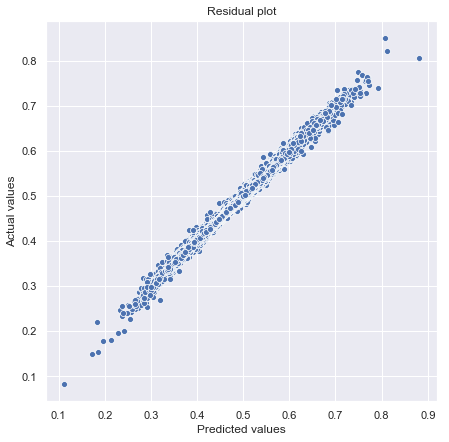

In [36]:
plot_one_residuals('bestmodel_10_shuffled_rmsprop', predictors=x_test, target=y_test)

Loaded model bestmodel_10_shuffled from disk.
[0.4496351  0.4458691  0.46415508 ... 0.4797121  0.48498464 0.47610623]


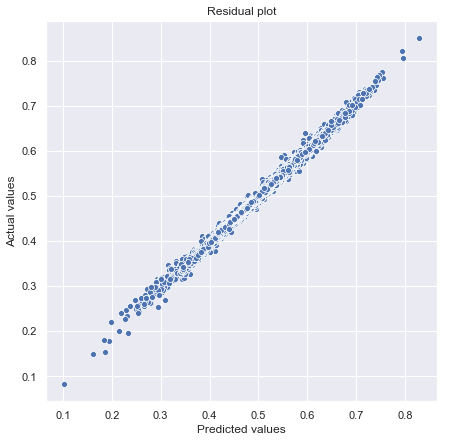

In [38]:
plot_one_residuals('bestmodel_10_shuffled', predictors=x_test, target=y_test)

Now it's time to create new features.

In [68]:
import numpy as np
from math import e
def min_stock(data): 
    for i in range(3):
        name = 's{}_pred'.format(i+1)
        stock = data[data.columns[i]]
        mu = data[data.columns[i+3]]
        sigma = data[data.columns[i+6]]
        t = data['Maturity']
        data[name] =stock*e**(mu - 1/2*sigma**2) #+ sigma*numpy.random.normal(loc=0.0, scale=1.0, size=1)*t**1/2
    data['min_stock'] = np. where(np.where(data.s1_pred<data.s2_pred, data.s1_pred, data.s2_pred) < data.s3_pred, np.where(data.s1_pred<data.s2_pred, data.s1_pred, data.s2_pred), data.s3_pred)


In [62]:
predictors['PhoenixRatio'] = predictors["PhoenixCoupon"]/(predictors["Bonus"] + predictors["YetiCoupon"])

In [69]:
min_stock(predictors)


In [74]:
predictors = predictors.drop(['s1_pred','s2_pred','s3_pred'], axis =1)

KeyError: "['s1_pred' 's2_pred' 's3_pred'] not found in axis"

In [75]:
list(predictors)

['S1',
 'S2',
 'S3',
 'mu1',
 'mu2',
 'mu3',
 'sigma1',
 'sigma2',
 'sigma3',
 'rho12',
 'rho13',
 'rho23',
 'Bonus',
 'YetiBarrier',
 'YetiCoupon',
 'PhoenixBarrier',
 'PhoenixCoupon',
 'PDIBarrier',
 'PDIGearing',
 'PDIStrike',
 'PDIType',
 'Maturity',
 'NbDates',
 'PhoenixRatio',
 'min_stock']

Loaded model bestmodel_new_features_10 from disk.
[0.45118016 0.44463664 0.4609836  ... 0.41128087 0.47222766 0.4511034 ]


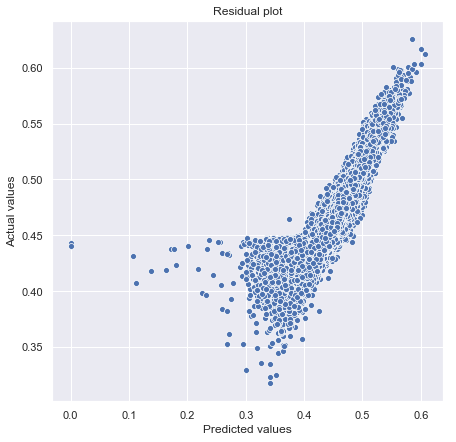

In [77]:
plot_one_residuals('bestmodel_new_features_10', predictors=predictors)